In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('..')
os.getcwd()

'/Users/benmurphy/Projects/nyc'

In [43]:
df = pd.read_csv('cleaned_trip_data.csv', 
                 usecols=['medallion', 'hack_license',
                          'pickup_hour', 'pickup_day_of_week', 'pickup_day_of_month',
                          'tip_amount', 'fare_amount'
                          
                         ])

df.head()

,medallion,hack_license,fare_amount,tip_amount,pickup_hour,pickup_day_of_month,pickup_day_of_week
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,6.0,1.0,15,25,Monday
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,5.5,3.0,15,25,Monday
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,15.0,2.0,9,25,Monday
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,14.0,2.9,6,25,Monday
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,12.0,2.0,10,25,Monday


# Is it possible to characterise taxi drivers based on work hours and how much they make?

In [75]:
# let's put pickup_hour into groups

pickup_hour_bins = [-1, 5, 11, 16, 23]
pickup_hour_labels = ["12am to 5:59am", "6am to 11:59", "12pm to 4:59pm", "5pm to 11:59pm"]

df["pickup_hour_bin"] = pd.cut(df['pickup_hour'], bins=pickup_hour_bins, labels=pickup_hour_labels).astype(str)

df.head()

,medallion,hack_license,fare_amount,tip_amount,pickup_hour,pickup_day_of_month,pickup_day_of_week,pickup_hour_bin,driver_earnings
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,6.0,1.0,15,25,Monday,12pm to 4:59pm,7.0
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,5.5,3.0,15,25,Monday,12pm to 4:59pm,8.5
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,15.0,2.0,9,25,Monday,6am to 11:59,17.0
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,14.0,2.9,6,25,Monday,6am to 11:59,16.9
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,12.0,2.0,10,25,Monday,6am to 11:59,14.0


In [77]:
# work out what shift each driver did the most trips in
driver_shift_worked_per_day = df[['hack_license', 'pickup_hour_bin']].value_counts().reset_index()

driver_shift_worked_per_day['most_common_shift'] = driver_shift_worked_per_day.groupby(['hack_license'])['count'].rank(method="first", ascending=False)

driver_shift_worked_per_day = driver_shift_worked_per_day.loc[driver_shift_worked_per_day['most_common_shift']==1]

driver_shift_worked_per_day = driver_shift_worked_per_day[driver_shift_worked_per_day['count'] > 30] # only keep drivers who did at least 1 trip per day on average

driver_shift_worked_per_day


,hack_license,pickup_hour_bin,count,most_common_shift
0,E76F8763F39B8B209929FB76E6CDE996,5pm to 11:59pm,776,1.0
1,392131034A21E74CE799215DA06C88DE,5pm to 11:59pm,738,1.0
2,8A717131CE5BA9080F9A28409D76C052,5pm to 11:59pm,728,1.0
3,747041C7F9EF5E4DD1C22B5EFFA6BF65,5pm to 11:59pm,715,1.0
4,20FA20D8FCF8C73A98FF4F4F0996DA9A,5pm to 11:59pm,713,1.0
...,...,...,...,...
74605,CA6716E390C2D05B6C8ADFE9421BFEB0,6am to 11:59,31,1.0
74612,D5F775AE5BF7714B44637F8C8EC5D4D7,12pm to 4:59pm,31,1.0
74617,79FF1744FE092E2245BCB486F6B3B030,12pm to 4:59pm,31,1.0
74626,6E11EF803E45C5435D601816F2188091,6am to 11:59,31,1.0


In [78]:
driver_shift_worked_per_day['pickup_hour_bin'].value_counts()

pickup_hour_bin
5pm to 11:59pm    16572
6am to 11:59       9571
12pm to 4:59pm     5334
12am to 5:59am      303
Name: count, dtype: int64

In [79]:
# calculate earnings per trip by summing fare and tip
df['driver_earnings'] = df['fare_amount'] + df['tip_amount']
df.head()

,medallion,hack_license,fare_amount,tip_amount,pickup_hour,pickup_day_of_month,pickup_day_of_week,pickup_hour_bin,driver_earnings
0,E9A54865CAF737ED003957478C9D8FA1,912A2B86F30CDFE246586972A892367E,6.0,1.0,15,25,Monday,12pm to 4:59pm,7.0
1,43D85E4D101135DDFC1BC16DF53665FE,B2981CEA18FB7E9D8E676EF228257AD1,5.5,3.0,15,25,Monday,12pm to 4:59pm,8.5
2,70166F37A5CC66D9A35366764ACC40DC,1BAF0067863EA446E21314F88A600B4D,15.0,2.0,9,25,Monday,6am to 11:59,17.0
3,0C05C17E209CA4C15F89107F9D686FF3,57732D1D0E713118D1FB1D359666596E,14.0,2.9,6,25,Monday,6am to 11:59,16.9
4,0ECC4D3D2025A987532E1E5B5B26A119,2A16D1DBD37DC6AD1BD02913D34E1B1C,12.0,2.0,10,25,Monday,6am to 11:59,14.0


In [85]:
earnings_per_driver = df.groupby('hack_license')['driver_earnings'].sum().reset_index()
earnings_per_driver

,hack_license,driver_earnings
0,0002555BBE359440D6CEB34B699D3932,6756.92
1,0006C8F9279EFD18D8E70193D98499CB,6314.83
2,0008B3E338CE8C3377E071A4D80D3694,7911.18
3,000B8D660A329BBDBF888500E4BD8B98,7212.27
4,000C15EFBDF58CAED528C09E597484EC,2059.67
...,...,...
33006,FFF657CFEC6A06384C97ACB500916913,4760.40
33007,FFF909B1353148850AD3E40BB878618B,4314.47
33008,FFFBCEA3D4E21E05902EE67AD556F67C,11369.54
33009,FFFC8985B6B37B60AE71741C01AC423A,1238.05


In [88]:
hack_license_common_shift_total_earnings = pd.merge(left=driver_shift_worked_per_day, right=earnings_per_driver, on='hack_license', how='left')

hack_license_common_shift_total_earnings

,hack_license,pickup_hour_bin,count,most_common_shift,driver_earnings
0,E76F8763F39B8B209929FB76E6CDE996,5pm to 11:59pm,776,1.0,10562.61
1,392131034A21E74CE799215DA06C88DE,5pm to 11:59pm,738,1.0,9870.24
2,8A717131CE5BA9080F9A28409D76C052,5pm to 11:59pm,728,1.0,12184.77
3,747041C7F9EF5E4DD1C22B5EFFA6BF65,5pm to 11:59pm,715,1.0,11684.05
4,20FA20D8FCF8C73A98FF4F4F0996DA9A,5pm to 11:59pm,713,1.0,13089.35
...,...,...,...,...,...
31775,CA6716E390C2D05B6C8ADFE9421BFEB0,6am to 11:59,31,1.0,694.27
31776,D5F775AE5BF7714B44637F8C8EC5D4D7,12pm to 4:59pm,31,1.0,882.50
31777,79FF1744FE092E2245BCB486F6B3B030,12pm to 4:59pm,31,1.0,1172.31
31778,6E11EF803E45C5435D601816F2188091,6am to 11:59,31,1.0,593.11


In [ ]:
average_fare_per_dropoff_hour = hack_license_common_shift_total_earnings.groupby('pickup_hour_bin')['driver_earnings'].mean().reset_index().rename(columns={'fare_amount': 'average_fare'})

# create a subplot with12 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))

sns.barplot(data=average_fare_per_dropoff_hour,
           x='dropoff_hour', y='average_fare',
           color='#3557E2')

# bars_0 = ax.containers[0]
# ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

# plt.ylim(0, 8)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Average fare amount per dropoff hour in November 2013",fontsize=20)
ax.set_xlabel("Hour of day",fontsize=15)
ax.set_ylabel("Average fare amount ",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);

plt.grid(True, color='black', linewidth=.1)

plt.show()

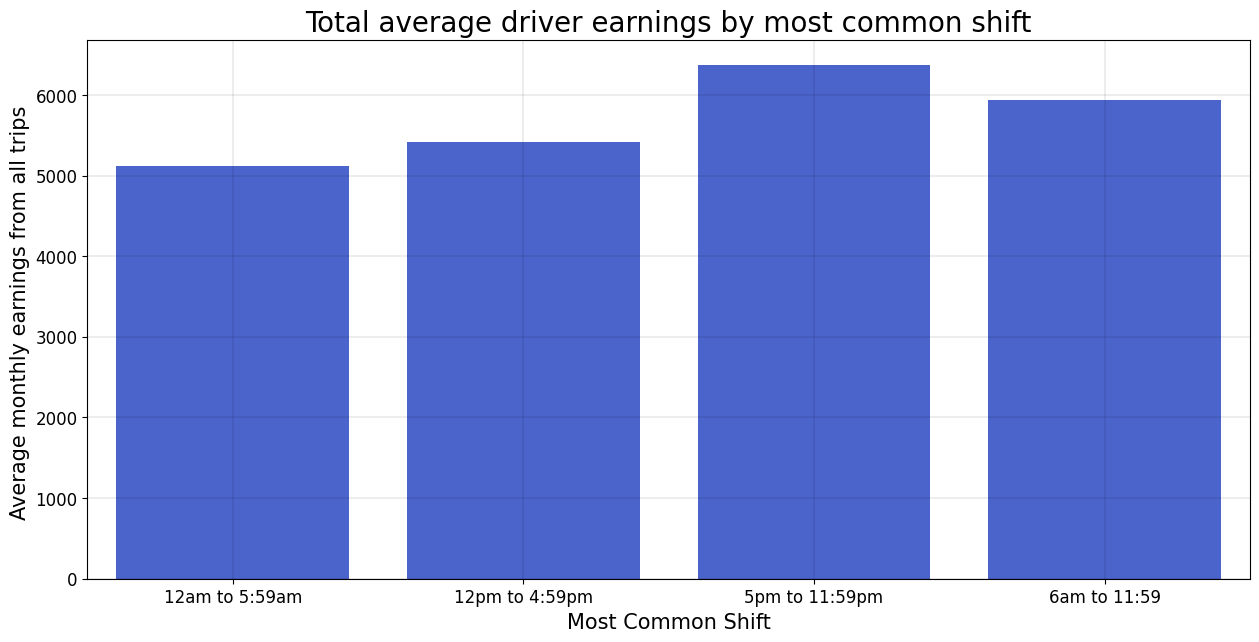

In [95]:
data_for_plot = hack_license_common_shift_total_earnings.groupby('pickup_hour_bin')['driver_earnings'].mean().reset_index().rename(
        columns={'driver_earnings': 'avg_driver_earnings'})



# create a subplot with12 rows and 1 columns
fig, ax = plt.subplots(1,1, figsize=(15, 7))

sns.barplot(data=data_for_plot,
           x='pickup_hour_bin', y='avg_driver_earnings',
           color='#3557E2')

# bars_0 = ax.containers[0]
# ax.bar_label(bars_0, labels=[f'{value:.1f}' for value in bars_0.datavalues], fontsize=15)

# plt.ylim(0, 8)  # Set the y-axis limits from 0 to 8

ax.axes.set_title("Total average driver earnings by most common shift",fontsize=20)
ax.set_xlabel("Most Common Shift",fontsize=15)
ax.set_ylabel("Average monthly earnings from all trips ",fontsize=15)

ax.yaxis.set_tick_params(labelsize = 12);
ax.xaxis.set_tick_params(labelsize = 12);

plt.grid(True, color='black', linewidth=.1)

plt.show()